Participant P01, Session 1, Pupil Dilation STD: 1.25
Participant P01, Session 2, Pupil Dilation STD: 0.61
Participant P01, Session 3, Pupil Dilation STD: 0.80
Participant P02, Session 1, Pupil Dilation STD: 0.49
Participant P02, Session 2, Pupil Dilation STD: 1.12
Participant P02, Session 3, Pupil Dilation STD: 0.48
Participant P03, Session 1, Pupil Dilation STD: 0.38
Participant P03, Session 2, Pupil Dilation STD: 0.65
Participant P03, Session 3, Pupil Dilation STD: 0.55
Participant P04, Session 1, Pupil Dilation STD: 0.42
Participant P04, Session 2, Pupil Dilation STD: 0.39
Participant P04, Session 3, Pupil Dilation STD: 0.23
Participant P05, Session 1, Pupil Dilation STD: 0.67
Participant P05, Session 2, Pupil Dilation STD: 1.09
Participant P05, Session 3, Pupil Dilation STD: 0.58
Participant P06, Session 1, Pupil Dilation STD: 0.27
Participant P06, Session 2, Pupil Dilation STD: 0.31
Participant P06, Session 3, Pupil Dilation STD: 0.50
Participant P07, Session 1, Pupil Dilation STD

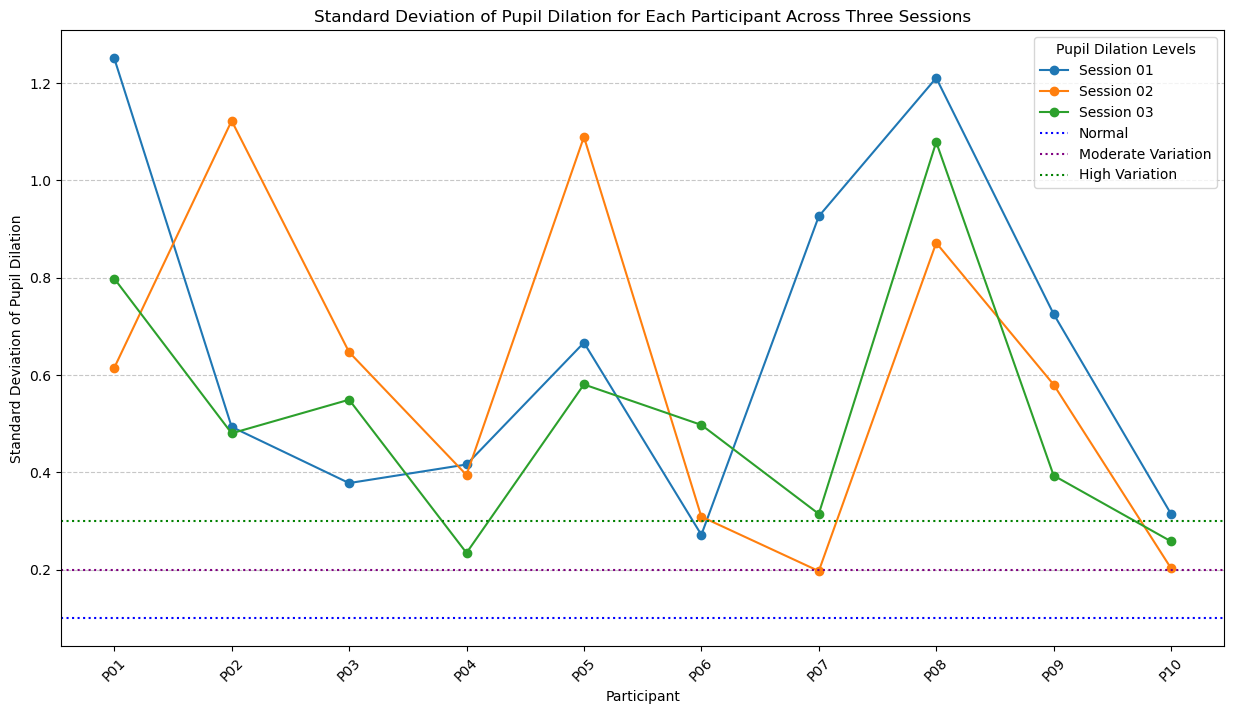

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate pupil dilation metrics
def calculate_pupil_dilation_std(pupil_data):
    valid_pupil_dilation = pd.Series(pupil_data)
    std_pupil_dilation = np.std(valid_pupil_dilation, ddof=1)
    return std_pupil_dilation

# Load datasets for all participants
participants_data = {
    'P01': [pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/sed_03.csv')],
    'P02': [pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/sed_03.csv')],
    'P03': [pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/sed_03.csv')],
    'P04': [pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/sed_03.csv')],
    'P05': [pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/sed_03.csv')],
    'P06': [pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/sed_03.csv')],
    'P07': [pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/sed_03.csv')],
    'P08': [pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/sed_03.csv')],
    'P09': [pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/sed_03.csv')],
    'P10': [pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/sed_03.csv')]
}

# Rename columns based on actual column names
columns_mapping = {
    'datetime': 'timestamp',
    'pupil': 'pupil_dilation',
    'leftEyeOpen': 'left_blink',
    'rightEyeOpen': 'right_blink'
}

# Process data for each participant
results = []

for participant_id, data in participants_data.items():
    participant_results = {'Participant': participant_id}
    for session_number, df in enumerate(data, start=1):
        df.rename(columns=columns_mapping, inplace=True)
        std_dev = calculate_pupil_dilation_std(df['pupil_dilation'])
        participant_results[f'Session {session_number:02d}'] = std_dev
        # Debug print for verification
        print(f"Participant {participant_id}, Session {session_number}, Pupil Dilation STD: {std_dev:.2f}")
    results.append(participant_results)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to a CSV file
results_df.to_csv('/Users/urmebose/Desktop/Pupil_Dilation_STD_Results.csv', index=False)

# Plot the standard deviations of pupil dilation for each participant across three sessions
results_df.set_index('Participant', inplace=True)
results_df.plot(figsize=(15, 8), marker='o')

plt.title('Standard Deviation of Pupil Dilation for Each Participant Across Three Sessions')
plt.ylabel('Standard Deviation of Pupil Dilation')
plt.xlabel('Participant')
plt.xticks(ticks=np.arange(len(results_df.index)), labels=results_df.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add reference lines for normal, moderate, and high variations (these are arbitrary values for demonstration purposes)
plt.axhline(y=0.1, color='blue', linestyle=':', label='Normal')
plt.axhline(y=0.2, color='purple', linestyle=':', label='Moderate Variation')
plt.axhline(y=0.3, color='green', linestyle=':', label='High Variation')

plt.legend(title='Pupil Dilation Levels')
plt.show()